In [1]:
from math import pi
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import IPython

In [2]:
def LinkwitzRiley24dB(fc, sr):
    omega = 2 * pi * fc / sr
    
    sineOmega = np.sin(omega)
    cosinePmega = np.cos(omega)
    alpha = sineOmega * np.sqrt(2) / 2
    a0 = 1 + alpha
    
    A1 = -( 2 * cosinePmega) / a0
    A2 = (1 - alpha) / a0
    B1 = (1 - cosinePmega) / a0 
    B0 = B1 / 2
    B2 = B0
    
    b_lp = np.convolve([B0, B1, B2], [B0, B1, B2])
    a_lp = np.convolve([1, A1, A2], [1, A1, A2])
    
    A1 = -(2 * cosinePmega) / a0
    A2 = (1 - alpha) / a0
    B1 = -(1 + cosinePmega) / a0
    B0 = -B1 / 2
    B2 = B0
    
    b_hp = np.convolve([B0, B1, B2], [B0, B1, B2])
    a_hp = np.convolve([1, A1, A2], [1, A1, A2])
    
    return [b_lp, a_lp], [b_hp, a_hp]

In [3]:
def LinkwitzRiley48dB(fc, sr):
    omega = 2 * pi * fc / sr
    
    sineOmega = np.sin(omega)
    cosinePmega = np.cos(omega)
    
    orderindex = [0, 1, 0, 1]
    b_lp = [1]
    a_lp = [1]
    b_hp = [1]
    a_hp = [1]
    for index in orderindex:
        orderangle = (np.pi / 4) * (index + 0.5)
        alpha = sineOmega / (2 * (1 / (2 * np.sin(orderangle))))
    
        a0 = 1 + alpha

        A1 = -( 2 * cosinePmega) / a0
        A2 = (1 - alpha) / a0
        B1 = (1 - cosinePmega) / a0 
        B0 = B1 / 2
        B2 = B0
        A0 = 1

        b_lp = np.convolve(b_lp, [B0, B1, B2])
        a_lp = np.convolve(a_lp, [A0, A1, A2])
    
        A1 = -(2 * cosinePmega) / a0
        A2 = (1 - alpha) / a0
        B1 = -(1 + cosinePmega) / a0
        B0 = -B1 / 2
        B2 = B0

        b_hp = np.convolve(b_hp, [B0, B1, B2])
        a_hp = np.convolve(a_hp, [A0, A1, A2])

    return [b_lp, a_lp], [b_hp, a_hp]

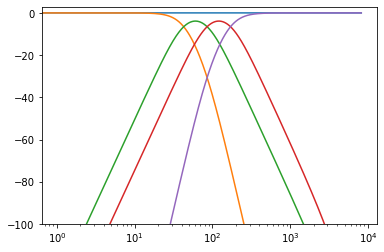

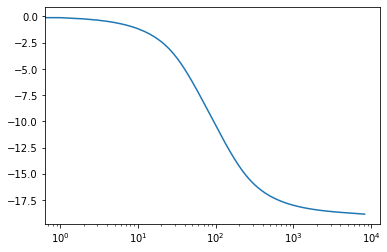

In [12]:
F1, F1_ = LinkwitzRiley24dB(125, 48000)
F2, F2_ = LinkwitzRiley24dB(250, 48000)
F3, F3_ = LinkwitzRiley24dB(500, 48000)

w, apf11 = signal.freqz(F1[0] + F1_[0], F1_[1], 8192)
w, apf31 = signal.freqz(F3[0] + F3_[0], F3_[1], 8192)

w, f1  = signal.freqz(F1[0],  F1[1], 8192)
w, f1_ = signal.freqz(F1_[0], F1_[1], 8192)
w, f2  = signal.freqz(F2[0],  F2[1], 8192)
w, f2_ = signal.freqz(F2_[0], F2_[1], 8192)
w, f3  = signal.freqz(F3[0],  F3[1], 8192)
w, f3_ = signal.freqz(F3_[0], F3_[1], 8192)

amplitude  = 20 * np.log10(abs(f2*f1*apf31 + f2*f1_*apf31 + f3*f2_*apf11 + f3_*f2_*apf11))

amplitude1 = 20 * np.log10(abs(f2*f1*apf31))
amplitude2 = 20 * np.log10(abs(f2*f1_*apf31))
amplitude3 = 20 * np.log10(abs(f3*f2_*apf11))
amplitude4 = 20 * np.log10(abs(f3_*f2_*apf11))

plt.plot(amplitude)
plt.plot(amplitude1)
plt.plot(amplitude2)
plt.plot(amplitude3)
plt.plot(amplitude4)

plt.ylim(-100, 3)
plt.xscale('log')
plt.show()

plt.plot(np.unwrap(np.angle(f2*f1*apf31 + f2*f1_*apf31 + f3*f2_*apf11 + f3_*f2_*apf11)))
plt.xscale('log')
plt.show()